In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np
from scipy.stats import kstest
from endoanalysis.datasets import MasksDataset
from endoanalysis.utils import decorate_areas_distr
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

Importing dab values:

In [2]:
DAB_VALUES_PROBES_PATH = "../data/dab_values/probes.npy"
DAB_VALUES_FULL_MASKS_PATH = "../data/dab_values/full.npy"
IMGS_DIR = "figs/"

In [3]:
dab_values_full_masks = np.load(DAB_VALUES_FULL_MASKS_PATH)
dab_values_probes = np.load(DAB_VALUES_PROBES_PATH)

Now lets make the plots:

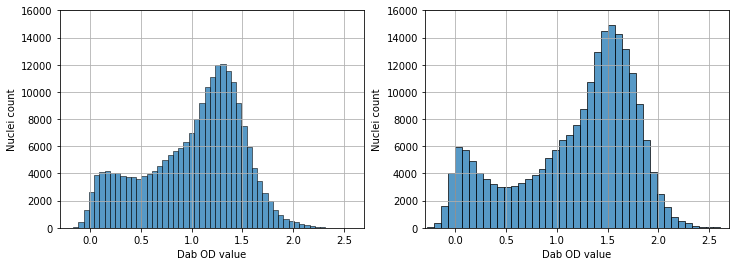

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
bins= "doane"
for ax in axs:
    decorate_areas_distr(fig, ax, xlabel="Dab OD value", ylabel="Nuclei count")
    ax.set_xlim(-0.3,2.7)
    ax.set_ylim(0.,16000)
_, bins_full = np.histogram(dab_values_full_masks, bins="doane")   
_, bins_probes = np.histogram(dab_values_full_masks, bins="doane") 

sns.histplot(dab_values_full_masks, bins=int(len(bins_full)*2), ax=axs[0])
sns.histplot(dab_values_probes, bins=int(len(bins_probes)*2), ax=axs[1])

# fig.savefig(os.path.join(IMGS_DIR, "dab_distros"), dpi=300)

Let's check whether these two samples cam from different distributions:

In [5]:
ks_results = kstest(dab_values_full_masks, dab_values_probes)
print(ks_results.pvalue)

0.0


The p-value is less than 2.2e-16 -- we can be sure, taht there are twqo different distributions.

Now let's check for multimodality using dip test:

In [6]:
importr('diptest')
rdip = robjects.r['dip.test']
r_full_masks = robjects.FloatVector(dab_values_full_masks)
r_probes = robjects.FloatVector(dab_values_probes)
test_results_full_masks = rdip(r_full_masks)
test_results_probes = rdip(r_probes[::15])
p_full_masks = test_results_full_masks[1][0]
p_probes = test_results_probes[1][0]


R[write to console]: n = 215738 > max_n{n in table} = 72000 -- using that as asymptotic value.



In [7]:
print("P-value for full masks: %f"%p_full_masks)
print("P-value for probes: %f"%p_probes)

P-value for full masks: 0.000005
P-value for probes: 0.000000


The p-value for full masks distribution is quite small -- we can state, that at the significance level  of 0.05 the distribution has mer than one mode.

The p-value for probes is less than 2.2e-16 -- we also can state, that this distibution is multimodal. 